In [65]:
%pip install yfinance
%pip install scipy
%pip install plotly
%pip install seaborn
%pip install nbformat
%pip install pingouin


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     --------------------------- ---------- 143.4/198.6 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 198.6/198.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---- ----------------------------------- 1.1/9.2 MB 34.4 MB/s eta 0:00:01
     -------------- ------------------------- 3.3/9.2 MB 42.0 MB/s eta 0:00:01
     ------------------------- -------------- 5.8/9.2 MB 46.6 MB/s eta 0:00:01
     ------------------------------------ --- 8.5/9.2 MB 49.2 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 53.3 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 41.9 MB/s eta 0:00:00
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Ob


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import numpy as np
import pandas as pd

from scipy import stats

import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import partial_corr

In [3]:
lista_ativos = ['^BVSP', '^GSPC']

dados_ibov_sp500 = yf.download(lista_ativos, start='2000-01-01')['Close']

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

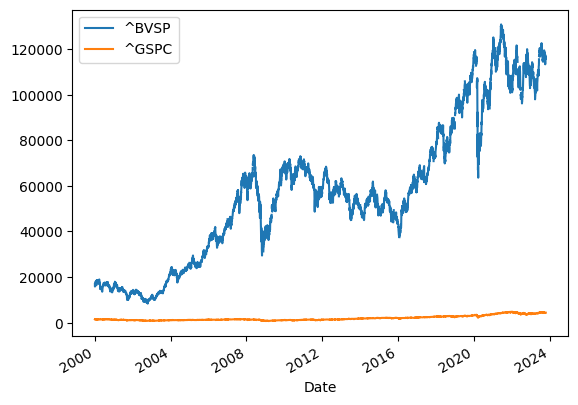

In [4]:
dados_ibov_sp500.plot()

<Axes: xlabel='Date'>

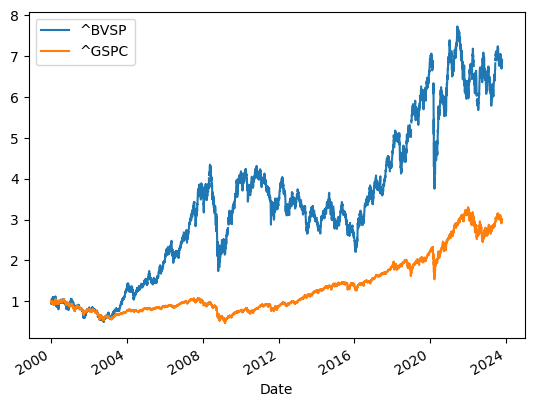

In [5]:
dados_normalizados = dados_ibov_sp500/dados_ibov_sp500.iloc[0]
dados_normalizados.plot()

C:\Users\wagne\AppData\Local\Temp\ipykernel_18032\1778669730.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  result_ibov_sp500 = dados_normalizados.pct_change()


<Axes: xlabel='Date'>

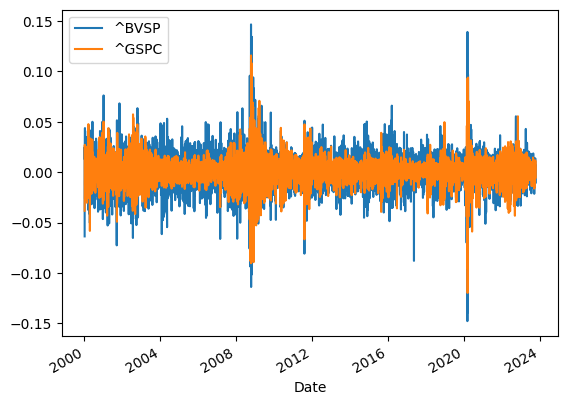

In [6]:
result_ibov_sp500 = dados_normalizados.pct_change()
result_ibov_sp500.dropna(inplace=True)
result_ibov_sp500.plot()

In [7]:
fig = px.scatter(x=result_ibov_sp500['^GSPC'], y=result_ibov_sp500['^BVSP'],
                 template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [8]:
fig = px.histogram(x=result_ibov_sp500['^GSPC'],
                 template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [9]:
fig = px.scatter(x=result_ibov_sp500['^GSPC'], y=result_ibov_sp500['^BVSP'],
                 template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [10]:
stats.pearsonr(result_ibov_sp500['^BVSP'], result_ibov_sp500['^GSPC'])

PearsonRResult(statistic=0.5838791200616228, pvalue=0.0)

In [11]:
corr, p = stats.pearsonr(result_ibov_sp500['^BVSP'], result_ibov_sp500['^GSPC'])

print('Correlação de Pearson, r=%.3f' %corr, 'p=%.8f' %p)

Correlação de Pearson, r=0.584 p=0.00000000


In [12]:
def testa_cor_par(acao1, acao2):

  dados = yf.download([acao1, acao2], start='2019-01-01', end='2022-08-27')['Close']

  dados_normalizados = dados/dados.iloc[0]

  retornos_diarios = dados_normalizados.pct_change()

  retornos_diarios.dropna(inplace=True)

  fig = px.scatter(x=retornos_diarios[acao1], y=retornos_diarios[acao2],
                  template='simple_white', width=400, height=400)
  fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))

  fig.show()

In [13]:
testa_cor_par('LREN3.SA', 'PRIO3.SA')

[*********************100%%**********************]  2 of 2 completed


In [14]:
testa_cor_par('WEGE3.SA', 'PETR4.SA')

[*********************100%%**********************]  2 of 2 completed


In [15]:
testa_cor_par('PRIO3.SA', 'PETR4.SA')

[*********************100%%**********************]  2 of 2 completed


In [45]:
lista_ativos = ['^BVSP', 'AMER3.SA']

dados = yf.download(lista_ativos, start='2022-01-01', end='2023-10-13')['Close']
dados_retornos = dados/dados.iloc[0]
dados_retornos = dados_retornos.pct_change()
dados_retornos = dados_retornos.dropna()
dados_retornos.tail()

[*********************100%%**********************]  2 of 2 completed


,AMER3.SA,^BVSP
Date,,
2023-10-05,0.013333,-0.002843
2023-10-06,-0.026316,0.007821
2023-10-09,0.040541,0.008636
2023-10-10,0.038961,0.013729
2023-10-11,0.062500,0.002690


In [46]:
fig = px.scatter(x=dados_retornos['^BVSP'], y=dados_retornos['AMER3.SA'],
                 template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [49]:
corr, p = stats.pearsonr(dados_retornos['AMER3.SA'], dados_retornos['^BVSP'])
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=0.304 p=0.000


In [50]:
corr, p = stats.spearmanr(dados_retornos['AMER3.SA'], dados_retornos['^BVSP'])
print('Correlação de Spearman, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Spearman, r=0.488 p=0.000


In [51]:
pd.read_csv('selic.csv')

,Date,Value
0,2000-01-01,19.00
1,2000-01-02,19.00
2,2000-01-03,19.00
3,2000-01-04,19.00
4,2000-01-05,19.00
...,...,...
8396,2022-12-27,13.75
8397,2022-12-28,13.75
8398,2022-12-29,13.75
8399,2022-12-30,13.75


In [52]:
selic = pd.read_csv('selic.csv', index_col='Date', parse_dates= True)

In [53]:
dados_ibov_sp500.head()

,^BVSP,^GSPC
Date,,
2000-01-03,16930.0,1455.219971
2000-01-04,15851.0,1399.420044
2000-01-05,16245.0,1402.109985
2000-01-06,16107.0,1403.449951
2000-01-07,16309.0,1441.469971


In [54]:
full = pd.merge(selic, dados_ibov_sp500, how = 'inner', on = 'Date' )

In [55]:
full.head()

,Value,^BVSP,^GSPC
Date,,,
2000-01-03,19.0,16930.0,1455.219971
2000-01-04,19.0,15851.0,1399.420044
2000-01-05,19.0,16245.0,1402.109985
2000-01-06,19.0,16107.0,1403.449951
2000-01-07,19.0,16309.0,1441.469971


In [56]:
full.rename(columns = {'^BVSP': 'IBOV', 'Value':'SELIC', '^GSPC':'S&P500'}, inplace = True)

In [57]:
full.head()

,SELIC,IBOV,S&P500
Date,,,
2000-01-03,19.0,16930.0,1455.219971
2000-01-04,19.0,15851.0,1399.420044
2000-01-05,19.0,16245.0,1402.109985
2000-01-06,19.0,16107.0,1403.449951
2000-01-07,19.0,16309.0,1441.469971


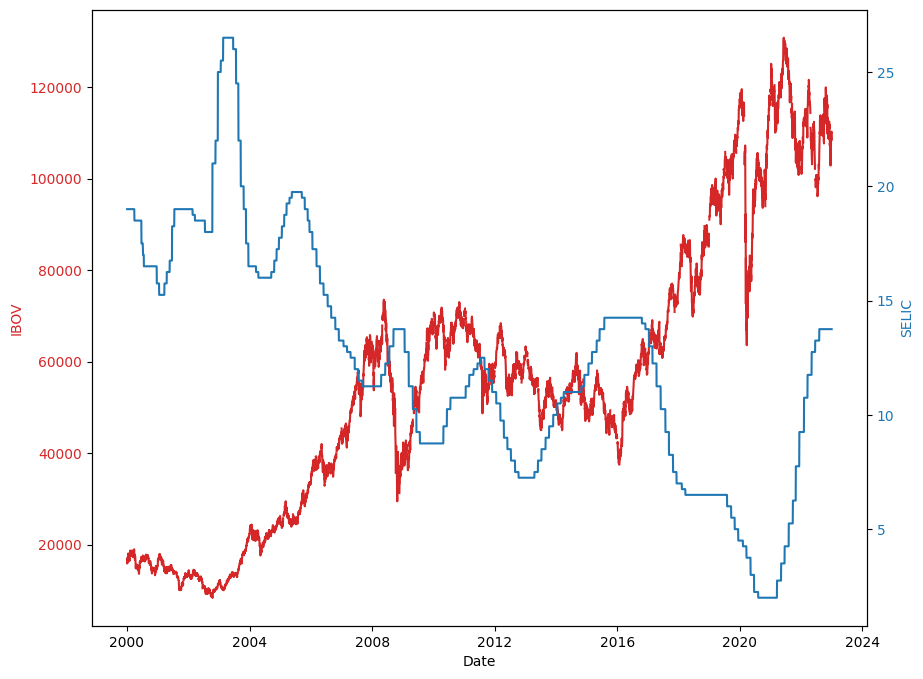

In [58]:
fig, ax1 = plt.subplots(figsize = (10,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(full.IBOV, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel('SELIC', color=color)
ax2.plot(full.SELIC, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

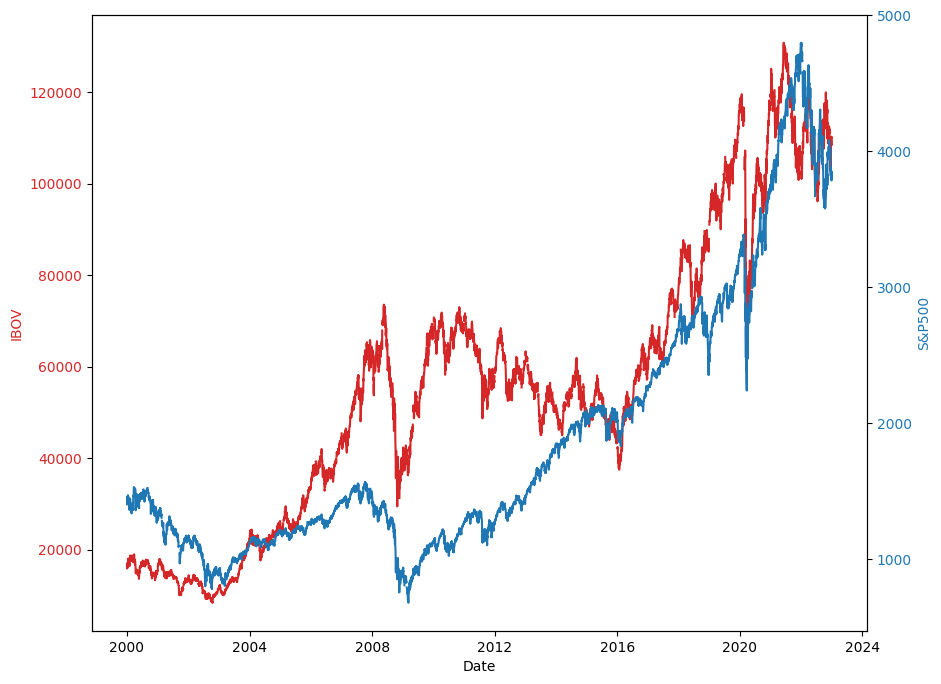

In [59]:
fig, ax1 = plt.subplots(figsize = (10,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(full.IBOV, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel('S&P500', color=color)
ax2.plot(full['S&P500'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [60]:
dados_ativos = yf.download(['PETR3.SA','RADL3.SA', 'OIBR3.SA','KNRI11.SA','FLMA11.SA','BOVA11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA','PETR4.SA','WEGE3.SA','SUZB3.SA','CSAN3.SA','VALE3.SA'], start='2017-01-01')['Close']
dados_ativos.head()

[*********************100%%**********************]  14 of 14 completed


,AAPL34.SA,BOVA11.SA,CSAN3.SA,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,
2017-01-02,4.72500,57.630001,9.2875,111.0,78.639999,141.309998,19.702110,16.530001,14.66,11.659615,54.000000,20.01,25.059999,5.807692
2017-01-03,4.67500,59.750000,9.7200,112.5,76.250000,141.220001,19.776739,17.580000,15.50,12.105769,55.450001,20.01,26.170000,6.100000
2017-01-04,4.65875,59.750000,9.7250,112.5,75.940002,142.940002,19.552851,17.370001,15.50,11.934615,56.990002,20.01,25.700001,5.953846
2017-01-05,4.68500,60.049999,9.7075,112.0,75.260002,143.000000,19.925997,17.760000,15.75,11.755769,56.990002,20.01,26.680000,5.938461
2017-01-06,4.71125,59.849998,9.4825,112.5,76.300003,143.949997,20.000626,17.490000,15.66,11.780769,56.500000,20.01,25.969999,5.988461


In [61]:
total_corr = pd.merge(full, dados_ativos, how = 'inner', on = 'Date' )

In [62]:
total_corr.head()

,SELIC,IBOV,S&P500,AAPL34.SA,BOVA11.SA,CSAN3.SA,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,
2017-01-02,13.75,59589.0,NaN,4.72500,57.630001,9.2875,111.0,78.639999,141.309998,19.702110,16.530001,14.66,11.659615,54.000000,20.01,25.059999,5.807692
2017-01-03,13.75,61814.0,2257.830078,4.67500,59.750000,9.7200,112.5,76.250000,141.220001,19.776739,17.580000,15.50,12.105769,55.450001,20.01,26.170000,6.100000
2017-01-04,13.75,61589.0,2270.750000,4.65875,59.750000,9.7250,112.5,75.940002,142.940002,19.552851,17.370001,15.50,11.934615,56.990002,20.01,25.700001,5.953846
2017-01-05,13.75,62071.0,2269.000000,4.68500,60.049999,9.7075,112.0,75.260002,143.000000,19.925997,17.760000,15.75,11.755769,56.990002,20.01,26.680000,5.938461
2017-01-06,13.75,61665.0,2276.979980,4.71125,59.849998,9.4825,112.5,76.300003,143.949997,20.000626,17.490000,15.66,11.780769,56.500000,20.01,25.969999,5.988461


In [63]:
total_corr.corr(method='pearson')

,SELIC,IBOV,S&P500,AAPL34.SA,BOVA11.SA,CSAN3.SA,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
SELIC,1.000000,-0.244832,0.007777,0.038368,-0.239290,-0.192635,-0.465833,-0.077559,-0.469105,-0.053128,0.126958,0.041918,-0.310245,-0.471476,-0.264527,-0.162254,-0.180049
IBOV,-0.244832,1.000000,0.827792,0.749137,0.999917,0.858773,0.344688,0.799247,-0.117499,-0.655476,0.785674,0.855550,0.797643,0.941288,0.781720,0.846086,0.785652
S&P500,0.007777,0.827792,1.000000,0.952683,0.829657,0.910960,-0.073626,0.968272,-0.478393,-0.617796,0.639734,0.711796,0.802853,0.751951,0.815944,0.889822,0.879007
AAPL34.SA,0.038368,0.749137,0.952683,1.000000,0.752347,0.896564,-0.139944,0.982782,-0.461646,-0.638422,0.556702,0.629101,0.823589,0.672389,0.795563,0.834899,0.932804
BOVA11.SA,-0.239290,0.999917,0.829657,0.752347,1.000000,0.860422,0.342317,0.798811,-0.116398,-0.655265,0.789397,0.858029,0.803560,0.939385,0.781000,0.846766,0.788370
CSAN3.SA,-0.192635,0.858773,0.910960,0.896564,0.860422,1.000000,0.106280,0.918852,-0.249548,-0.598669,0.539212,0.641100,0.903359,0.871209,0.765129,0.850643,0.904868
FLMA11.SA,-0.465833,0.344688,-0.073626,-0.139944,0.342317,0.106280,1.000000,-0.061090,0.588705,-0.316849,0.287238,0.306525,0.220768,0.428209,-0.022345,-0.077732,-0.037529
IVVB11.SA,-0.077559,0.799247,0.968272,0.982782,0.798811,0.918852,-0.061090,1.000000,-0.441417,-0.667787,0.572684,0.650792,0.847461,0.742149,0.846631,0.868750,0.934247
KNRI11.SA,-0.469105,-0.117499,-0.478393,-0.461646,-0.116398,-0.249548,0.588705,-0.441417,1.000000,0.299366,-0.224696,-0.205043,-0.060322,0.044374,-0.375500,-0.440893,-0.278168
OIBR3.SA,-0.053128,-0.655476,-0.617796,-0.638422,-0.655265,-0.598669,-0.316849,-0.667787,0.299366,1.000000,-0.706337,-0.706539,-0.565677,-0.525954,-0.556203,-0.508498,-0.551182


<Axes: >

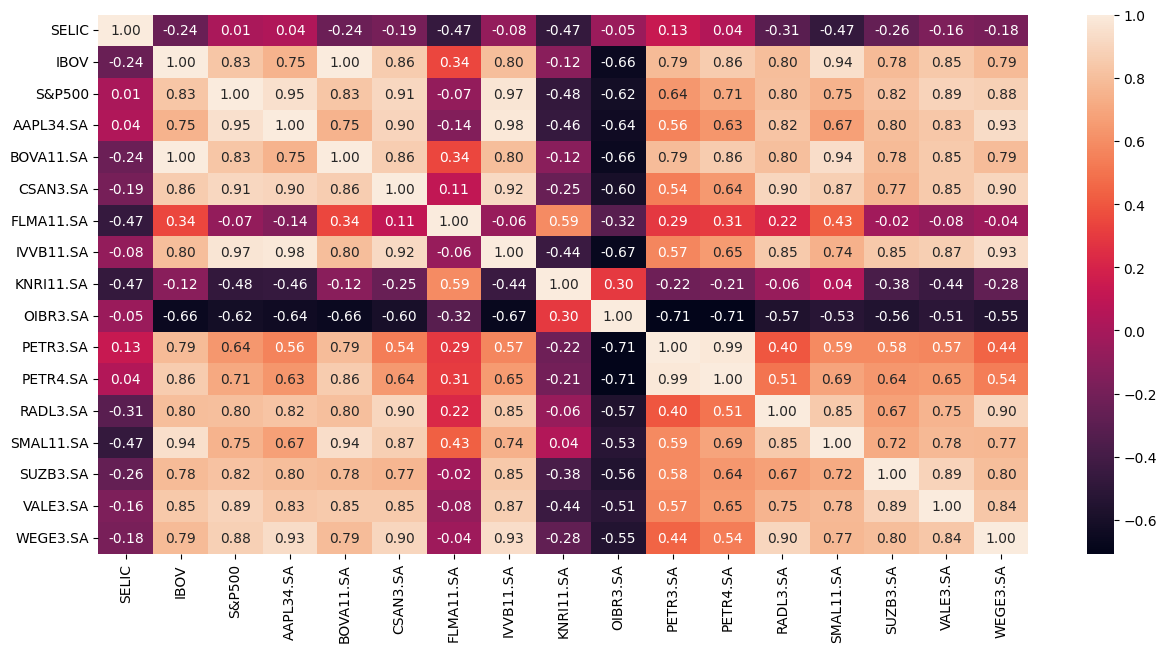

In [64]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(total_corr.corr(method='pearson'), annot=True, fmt=".2f")

In [66]:
lista_ativos = ['^BVSP', '^GSPC', 'BRL=X']

dados_ibov_sp500 = yf.download(lista_ativos, start='2007-02-01', end='2022-01-01')['Close']

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

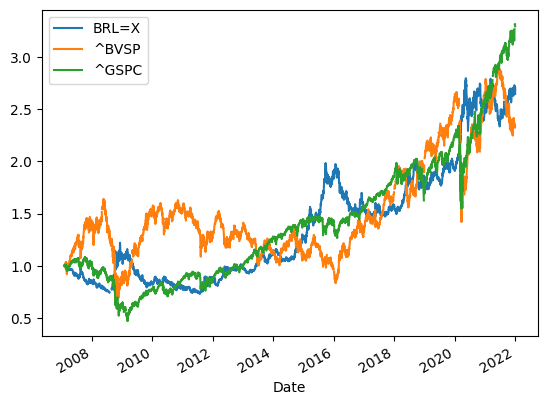

In [68]:
(dados_ibov_sp500/dados_ibov_sp500.iloc[0]).plot()

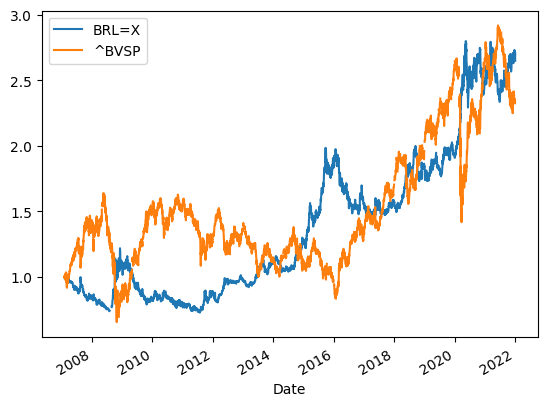

In [69]:
(dados_ibov_sp500.iloc[:,:2]/dados_ibov_sp500.iloc[0,:2]).plot()

In [70]:
dados_ibov_sp500 = dados_ibov_sp500.dropna()
dados_ibov_sp500

,BRL=X,^BVSP,^GSPC
Date,,,
2007-02-01,2.1032,44815.0,1445.939941
2007-02-02,2.0925,44998.0,1448.390015
2007-02-05,2.0897,45286.0,1446.989990
2007-02-06,2.0825,45352.0,1448.000000
2007-02-07,2.0820,44588.0,1450.020020
...,...,...,...
2021-12-23,5.6530,104891.0,4725.790039
2021-12-27,5.6711,105531.0,4791.189941
2021-12-28,5.6241,104864.0,4786.350098


In [71]:
dados_filtrados = dados_ibov_sp500[dados_ibov_sp500.index < '2018']

In [72]:
corr, p = stats.pearsonr(dados_filtrados['^BVSP'], dados_filtrados['BRL=X'])
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=-0.271 p=0.000


In [74]:
partial_corr(data=dados_filtrados, x= 'BRL=X', y='^BVSP', covar=['^GSPC'], method='pearson')

,n,r,CI95%,p-val
pearson,2603,-0.574179,"[-0.6, -0.55]",3.986885e-228


<Axes: xlabel='Date'>

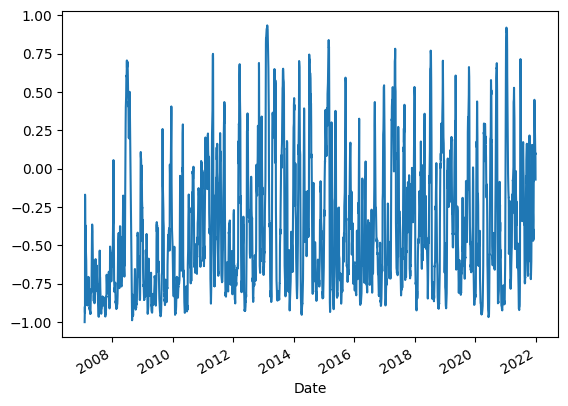

In [75]:
dados_ibov_sp500['^BVSP'].rolling('30D').corr(dados_ibov_sp500['BRL=X']).plot()

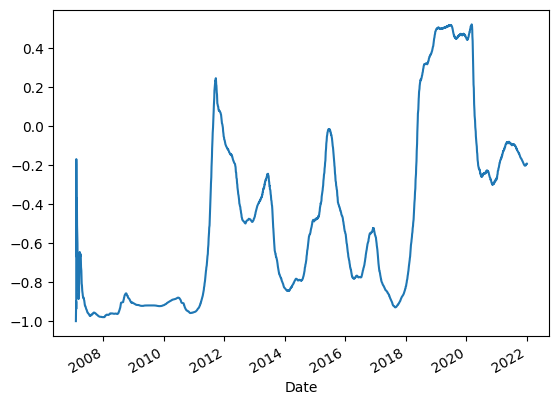

In [76]:
dados_ibov_sp500['^BVSP'].rolling('730D').corr(dados_ibov_sp500['BRL=X'], pairwise = True).plot();